This Notebook will go over Feature extraction ,and some Visualization methods

lets start with imports and loading the main class Molecules that works on a directory with feather files,

Change ROOT_DIR accordingly.


In [10]:
# ===Jupyter notebook setup commands===
%reset -f
%reload_ext autoreload
%autoreload 2

# ===imports===
import os
import sys
import importlib
import numpy as np
import pandas as pd
from pathlib import Path
# === Setup ===
# Might need to change to main directory of MolFeatures - r'/your/path/to/MolFeatures'
ROOT_DIR = Path().resolve().parent
print(f"Setting ROOT_DIR to: {ROOT_DIR}")
sys.path.append(ROOT_DIR)
sys.path.append(os.path.join(ROOT_DIR, 'M3_modeler'))
sys.path.append(os.path.join(ROOT_DIR, 'M2_data_extractor'))
sys.path.append(os.path.join(ROOT_DIR, 'utils'))
os.chdir(ROOT_DIR)  # Set working directory

# === Clear old module caches ===
for module in ['data_extractor', 'feather_extractor', 'gaussian_handler', 'help_functions', 'modeling', 'plot']:
    sys.modules.pop(module, None)

# === Safe Imports ===
try:
    from data_extractor import Molecules, extract_connectivity
    from feather_extractor import logs_to_feather
    import gaussian_handler
    from gaussian_handler import feather_file_handler
    from help_functions import dict_to_horizontal_df, get_df_from_file, pick_samples_to_remove_for_distribution
    import help_functions
    import visualize
    from modeling import (
        ClassificationModel,
        LinearRegressionModel,
        fit_and_evaluate_single_combination_regression,
        fit_and_evaluate_single_combination_classification
        
    )
    import plot
    
except ModuleNotFoundError as e:
    print(f"Module import failed: {e} \nPlease ensure all required modules are installed and available in the path specified on the right hand corner of the notebook.")
# === Config ===
pd.set_option('display.max_columns', None)
examples_path=ROOT_DIR / 'Getting_started_with_examples'
os.chdir(examples_path)  # Ensure working directory is examples_path



Setting ROOT_DIR to: C:\Users\edens\Documents\GitHub\LabCode\MolFeatures


In [11]:

# === Load molecular data ===
# if you want to convert your own log files to feather format use - logs_to_feather(dir_path)

feather_path = examples_path / 'feather_example' # or other feather directory
mols = Molecules(feather_path)

Molecules Loaded: ['basic.feather', 'm_Br.feather', 'm_Cl.feather', 'm_F.feather', 'm_I.feather', 'm_nitro.feather', 'o_Br.feather', 'o_Cl.feather', 'o_F.feather', 'o_I.feather', 'o_nitro.feather', 'penta_F.feather', 'p_amine.feather', 'p_azide.feather', 'p_boc.feather', 'p_Br.feather', 'p_Cl.feather', 'p_F.feather', 'p_I.feather', 'p_Me.feather', 'p_nitro.feather', 'p_OEt.feather', 'p_OH.feather', 'p_OMe.feather', 'p_Ph.feather', 'p_tfm.feather'] Failed Molecules: []


Great, we can see the files were loaded !

lets print the methods for the mols object we created to see what wee can use. 

for more advanced use go to the class Molecules in the data_extractor in M2_data_extractor

In [3]:
methods=[method for method in dir(mols) if not method.startswith('_')]
print(methods)

['export_all_xyz', 'extract_all_dfs', 'extract_all_xyz', 'failed_molecules', 'filter_molecules', 'get_bend_vibration_dict', 'get_bond_angle_dict', 'get_bond_length_dict', 'get_charge_df_dict', 'get_charge_diff_df_dict', 'get_dipole_dict', 'get_molecules_features_set', 'get_npa_dict', 'get_ring_vibration_dict', 'get_sterimol_dict', 'get_stretch_vibration_dict', 'molecules', 'molecules_names', 'molecules_path', 'old_molecules', 'old_molecules_names', 'renumber_all_molecules', 'success_molecules', 'visualize_molecules', 'visualize_smallest_molecule', 'visualize_smallest_molecule_morfeus']


In [14]:
mols.molecule_names

AttributeError: 'Molecules' object has no attribute 'molecule_names'

Great now lets use visualize_molecules to see the first molecule of the set.

You can use the dropdown menu for more options.

In [17]:
mols.visualize_molecules([11])

Some examples of methods  : use the molecule's atom indices to extract relavent features 

In [16]:
# Get ring vibration data for the whole set - pick one atom located on a six membered ring
# it is recommanded to use a visualization tool to look at the vibrations 
mols.get_ring_vibration_dict([9])

,cross,cross_angle,para,para_angle
basic,1657.1445,28.914133,1680.2718,60.763308
m_Br,1641.5631,33.597172,1669.3498,54.571698
m_Cl,1647.6226,28.129027,1672.1898,60.369503
m_F,1667.7992,29.639712,1687.4749,58.569790
m_I,1635.9083,33.982134,1665.1876,54.884821
m_nitro,1652.8928,29.943044,1670.1614,74.902394
o_Br,1640.9503,33.934871,1667.6032,55.686555
o_Cl,1644.3875,36.610454,1669.8139,51.566367
o_F,1661.2122,22.318641,1690.3239,67.050090
o_I,1636.0173,33.122575,1662.2976,55.376466


In [13]:
mols.get_stretch_vibration_dict([[1,3],[27,29]],threshold=1500).head(5)

Calculating stretch vibration for atoms [[1, 3], [27, 29]] with threshold 1500 
 Remember : ALWAYS LOOK AT THE RESULTING VIBRATION


,Frequency_Stretch_1_3,Amplitude_Stretch_1_3,Frequency_Stretch_27_29,Amplitude_Stretch_27_29
basic,1793.7506,1.438890,1909.4094,1.615949
m_Br,1799.0847,1.439634,1906.3996,1.626142
m_Cl,1799.3747,1.434360,1906.5924,1.619606
m_F,1797.8717,1.427607,1907.2265,1.615867
m_I,1798.8023,1.433790,1907.2956,1.608402


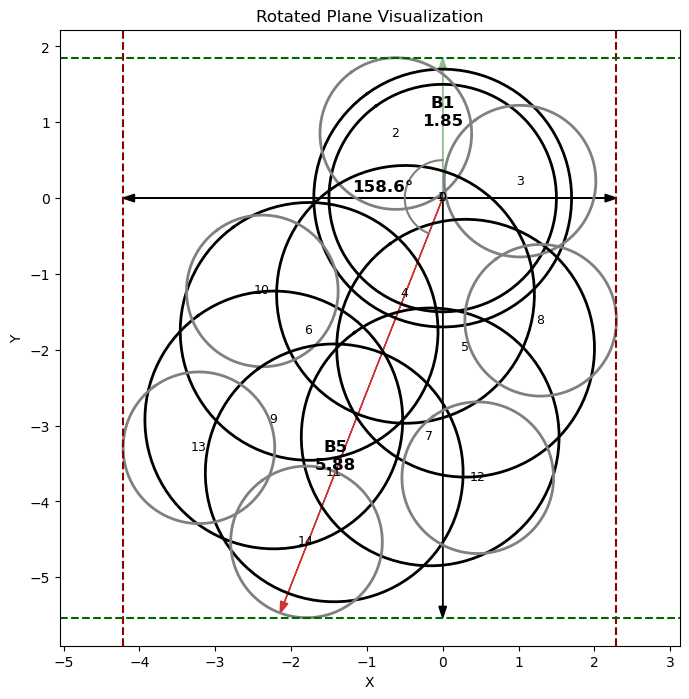

B1 B5 Plane


,B1_1-4,B5_1-4,L_1-4,loc_B5_1-4,B1_B5_angle_1-4,B1_4-1,B5_4-1,L_4-1,loc_B5_4-1,B1_B5_angle_4-1
basic,1.8509,5.8766,5.3493,3.7970,158.6045,2.2038,3.8912,7.4167,3.3540,135.9152
m_Br,1.8494,5.9249,7.0545,5.1045,170.1909,2.1975,3.9004,7.4085,3.3230,135.9484
m_Cl,1.8495,5.8864,6.7751,3.7831,157.5289,2.1983,3.9008,7.4074,3.3256,135.9795
m_F,1.8498,5.8744,6.0469,3.8180,158.2491,2.2012,3.8963,7.4117,3.3352,135.9244
m_I,1.8496,6.3463,7.2740,5.1240,167.4796,2.1992,3.8996,7.4089,3.3236,135.9153


In [7]:
# use single class Molecule by mols.molecules[0] to show sterimol for the first molecule in set 
mols.molecules[0].get_sterimol([1,4],visualize_bool=True)
#for multiple molecules add ,visualize_bool=True after indices list to visualize sterimol on B1 B5 plane
mols.get_sterimol_dict([[1,4],[4,1]]).head(5) 
# Notice we can extract features with a lone list [1,4] or list of lists [[1,2],[3,4],...] for multiple sites

In [18]:
# use single class Molecule to show dipole arrows for the first molecule in set : toggle show dipole on the top left corner
# Notice that the indices defined a new common plane as the origin for the transformed dipole vector component.
mols.molecules[0].get_dipole_gaussian_df_single([1,2,3],visualize_bool=True)
mols.get_dipole_dict([1,2,3]).head(5)

,dipole_x_1-2-3,dipole_y_1-2-3,dipole_z_1-2-3,total_dipole_1-2-3
basic,-2.046363,3.530534,3.401007,5.3122
m_Br,-0.046471,3.170669,2.717470,4.1761
m_Cl,-0.157568,3.184321,2.735312,4.2008
m_F,-0.373425,3.223469,2.774059,4.2691
m_I,-0.316566,3.176521,2.715818,4.1911


The other methods in the molecules class can be used in the same way as the examples above.

**The recommanded method : extracting all available features for your dataset**

In [9]:
answers_dict = {
    "Ring Vibration atoms - by order -> Pick one  atom from a six member ring\n example: 13": [9],
    "Stretch Threshold": [1600],
    "Stretching Vibration atoms- enter bonded atom pairs: \n example: 1,2 4,5": [],
    "Bend Threshold": [3000],
    "Bending Vibration atoms - enter atom pairs that have a common atom: \n example: 4,7": [5, 6],
    "Center_Atoms Dipole": [],
    "Dipole atoms - indices for coordination transformation: \n example: 4,5,6 - origin, y-axis, new xy plane": [[1, 2, 19], [20, 19, 27]],
    "Sub-Atoms NPA": [1, 3, 5, 11, 8, 12, 14, 4, 6] ,
    "NPA manipulation atoms - Insert atoms to show NPA: \n example: 1,2,4": [[1, 2, 19], [20, 19, 27]],
    "charges values - Insert atoms to show charge: \n example: 1,2,3,4": [3,5,11,12,4,6,20,21,22,7],
    "charge_diff - Insert atoms to show charge difference: \n example: 1,2 3,4": [[3, 2], [29, 28], [2, 29]],
    "Sterimol atoms - Primary axis along: \n example: 7,8": [[4,1], [1, 4]],
    'drop_atoms - Atoms to drop: \n example: 1,2,3': [],
    "Bond_length - Atom pairs to calculate difference: \n example: 1,2 4,5": [[11, 6], [6, 4], [1, 5], [11, 6],[22,23]],
    'Bond_angle - Atom triplets to calculate difference: \n example: 1,2,3 4,5,6': [[11, 6, 4], [6, 4, 5], [1, 5, 4], [11, 6, 4]],
}
df=mols.get_molecules_features_set(entry_widgets=answers_dict,answers_list=None, save_as=True,csv_file_name='features')

interactive(children=(FloatSlider(value=0.9, description='Threshold', max=1.0, step=0.01), Output()), _dom_cla…

             cross  cross_angle       para  para_angle  Frequency_Bending_5-6  \
penta_F  1705.8671    24.537430  1721.7035   64.060140              3155.8290   
p_tfm    1656.7011    32.609309  1693.8106   57.036819              3134.6727   
p_nitro  1709.1878    28.332490  1675.9797   60.094452              3135.1549   
p_boc    1655.0745    28.863077  1690.6121   59.982045              3130.1273   
p_azide  1646.5686    21.144995  1686.1110   69.023587              3131.5441   

         Cross_mag_Bending_5-6  dip_x_NPA_1-2-19  dip_y_NPA_1-2-19  \
penta_F               0.478432          1.049012         -0.539026   
p_tfm                 0.427941          5.186875         -0.223877   
p_nitro               0.441214          5.123442         -0.283907   
p_boc                 0.474752          4.964201         -0.228569   
p_azide               0.432109          5.257189         -0.093588   

         dip_z_NPA_1-2-19  total_dipole_NPA_1-2-19  dip_x_NPA_20-19-27  \
penta_F          2

**The obtained features_csv file can be used in the Practical_Notebook_Modeling**